In [1]:
#This article discusses the basics of linear regression and its implementation in the Python
#  programming language.
#  Linear regression is a statistical method for modeling relationships between a dependent va
#  riable with a given set of independent variables.
#  Note: In this article, we refer to dependent variables as responses and independent variables as
#  features for simplicity.
#  In order to provide a basic understanding of linear regression, we start with the most basi
#  c version of linear regression, i.e. Simple linear regression.
#  Simple Linear Regression
#  Simple linear regression is an approach for predicting a response using a single feature.
#  It is assumed that the two variables are linearly related. Hence, we try to find a linear function
#  that predicts the response value(y) as accurately as possible as a function of the feature or 
#  independent variable(x).
#  Let us consider a dataset where we have a value of response y for every feature x: 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df=pd.read_csv("D:Salary_Data.csv")

In [5]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
# Here the dependent Variable is Salary and independent variable is Experiences.......

# EDA And Data- Visulization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
df[df.duplicated()].shape

(0, 2)

In [11]:
df[df.duplicated()]

,YearsExperience,Salary


# Plotting the data to check for outliers

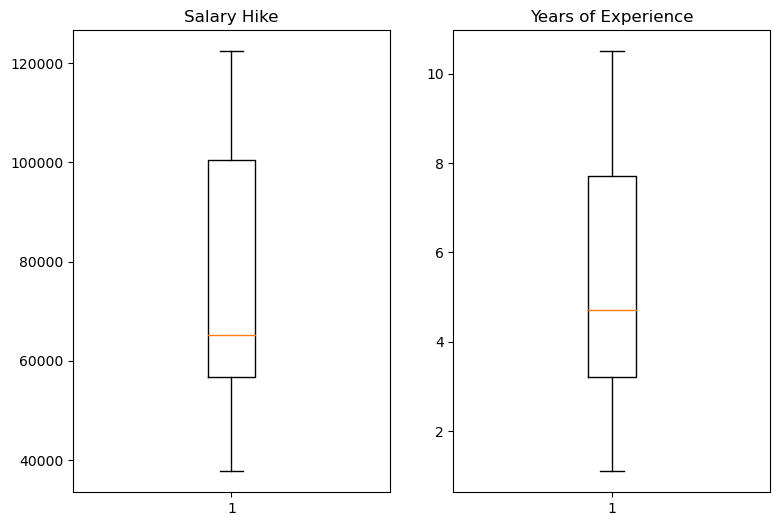

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

# As you can see there are no Outliers in the data

Checking the Correlation between variables

In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization of Correlation beteen x and y

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

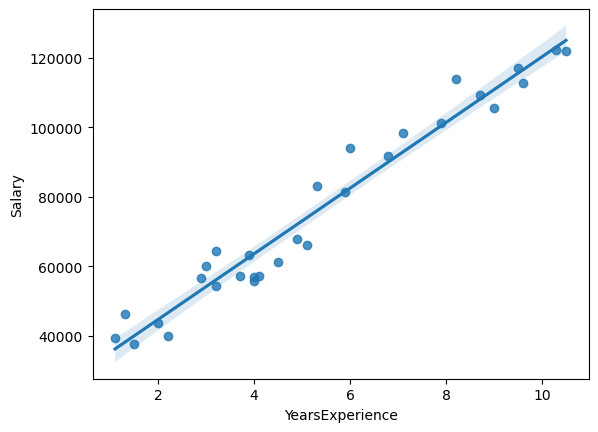

In [14]:
sns.regplot(x=df['YearsExperience'],y=df['Salary']) 

# As you can see above
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

# Checking for Homoscedasticity or Hetroscedasticity

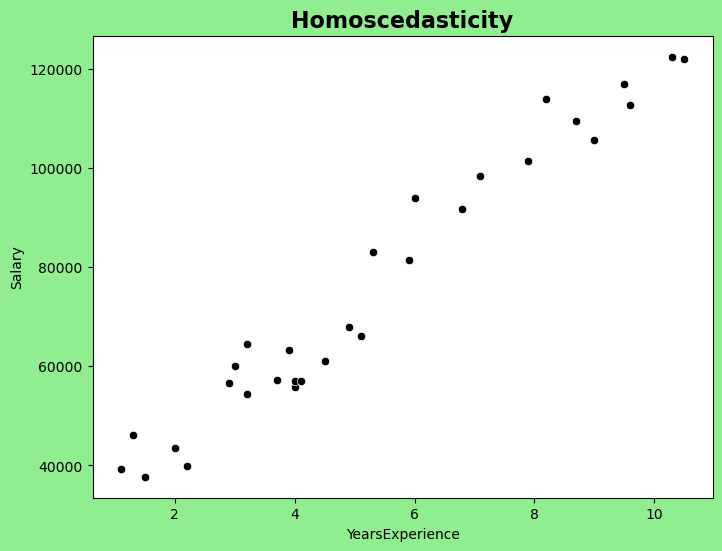

In [15]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'],color="black")
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

# As you can see in above graph
It shows as the Salary Increases the Years of Experience increases variation is constant along the way in data
The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

In [16]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# Feature Engineering
Trying different transformation of data to estimate normal distribution and remove any skewness

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


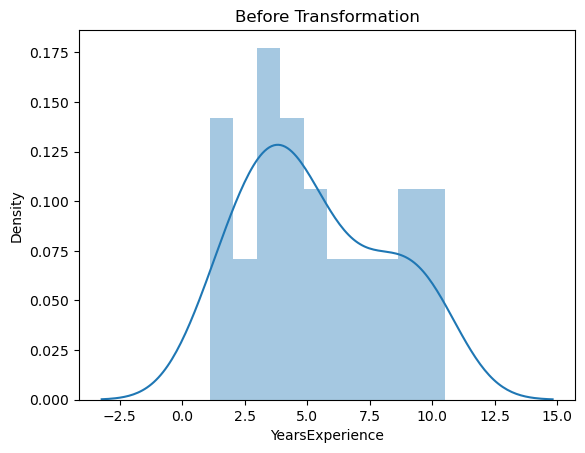

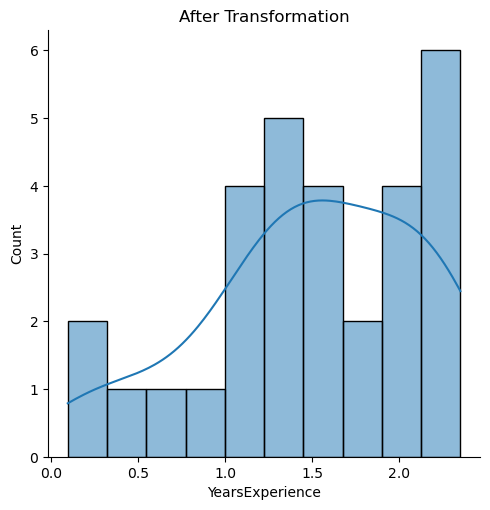

In [17]:

Labels=["Before Transformation","After Transformation"]
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


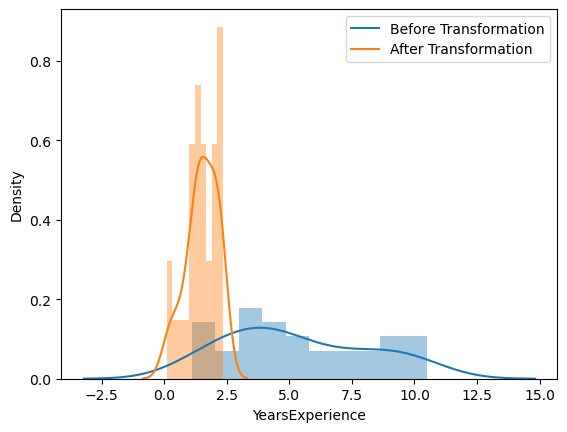

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

How log transformation affects the data and it scales the values down.
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

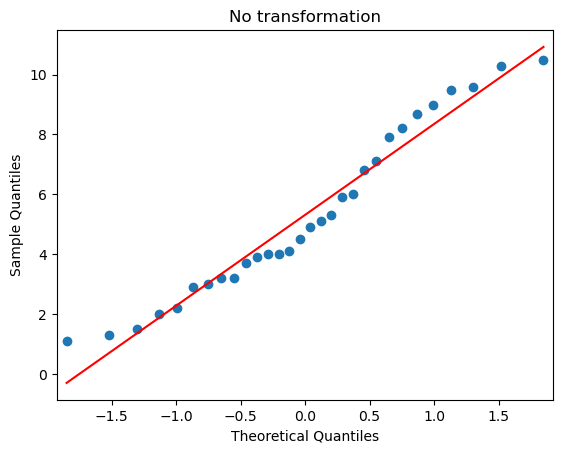

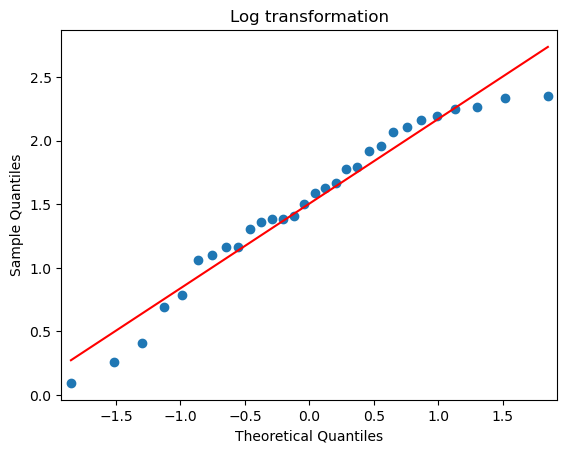

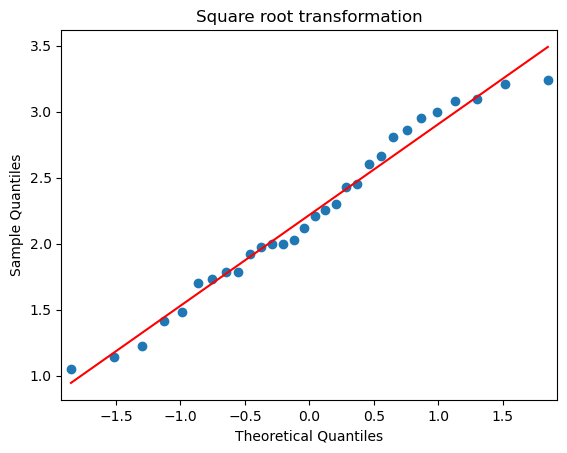

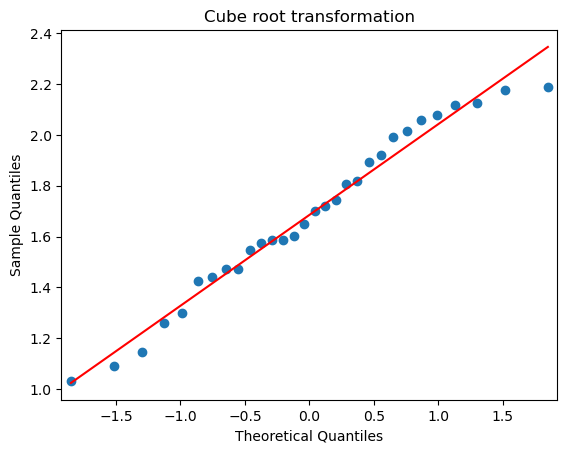

In [19]:
import statsmodels.api as smf
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Important Note:
We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression
It is a statistical method of analysis that estimates the relationship between one or 
more independent variables and a dependent variable; the method estimates the relationship 
by minimizing the sum of the squares in the difference between the observed and predicted values of the
dependent variable configured as a straight line...............

In [20]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        02:34:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

# Lets Try some data transformation to check whether these scores can get any better than this.

# Square Root transformation on data

In [22]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           7.58e-19
Time:                        02:34:25   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)

# Cuberoot transformation on Data

In [23]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           6.37e-18
Time:                        02:34:25   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [24]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           7.40e-16
Time:                        02:34:25   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
x=df[["YearsExperience"]]
y=df["Salary"]

In [27]:
from sklearn.linear_model import LinearRegression# for import linear Regression FFormula....
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [28]:
Intercept=LR.intercept_.round(3)

In [29]:
Years_Experience=(LR.coef_).round(3)

In [30]:
print(Intercept)

25792.2


In [31]:
Years_Experience=float(Years_Experience)
print(Years_Experience)

9449.962


# Model Will Prediction.........

In [32]:
model=LR.predict(x)

In [33]:
model

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,model)
print("Mean Squared Error Will be : ",mse.round(3))
RSE=np.sqrt(mse).round(3)
print("Root Mean Squared Error Will be :",RSE.round(3))
print("R Square value will be :",r2_score(y,model).round(3))

Mean Squared Error Will be :  31270951.722
Root Mean Squared Error Will be : 5592.044
R Square value will be : 0.957


In [35]:
RSE

5592.044

# Model Validation
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance 
(squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.
Comparing different models with respect to the Root Mean Squared Errors

In [36]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

# FOR MODEL 1

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y,model1_pred_y)
print("Mean Squared Error Will be : ",mse1.round(3))
RSE1=np.sqrt(mse1).round(3)
print("Root Mean Squared Error Will be :",RSE1.round(3))
print("R Square value will be :",r2_score(y,model1_pred_y).round(3))

Mean Squared Error Will be :  35529313.805
Root Mean Squared Error Will be : 5960.647
R Square value will be : 0.951


# FOR MODEL 2

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
mse2=mean_squared_error(y,model2_pred_y)
print("Mean Squared Error Will be : ",mse2.round(3))
RSE2=np.sqrt(mse2).round(3)
print("Root Mean Squared Error Will be :",RSE2.round(3))
print("R Square value will be :",r2_score(y,model2_pred_y).round(3))

Mean Squared Error Will be :  38847988.507
Root Mean Squared Error Will be : 6232.815
R Square value will be : 0.947


# FOR MODEL-3

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
mse3=mean_squared_error(y,model3_pred_y)
print("Mean Squared Error Will be : ",mse3.round(3))
RSE3=np.sqrt(mse3).round(3)
print("Root Mean Squared Error Will be :",RSE3.round(3))
print("R Square value will be :",r2_score(y,model3_pred_y).round(3))

Mean Squared Error Will be :  52124313.19
Root Mean Squared Error Will be : 7219.717
R Square value will be : 0.928


In [40]:
rmse={'model': RSE, 'model1': RSE1, 'model2': RSE2, 'model3' : RSE3}
min(rmse,key=rmse.get)

'model'

# As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values
Model is that Simple Linear regression model where we did not perfrom any data transformation and got the highest Adjusted
R-squaredvalue


# Predicting values

In [41]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model)
predicted2

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


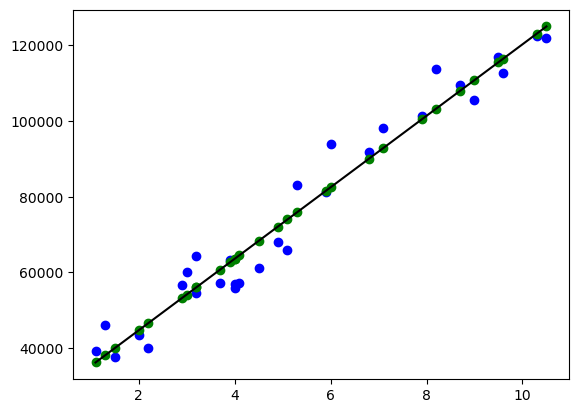

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model,color="green")
plt.plot(df["YearsExperience"],model,color="black")
plt.show()

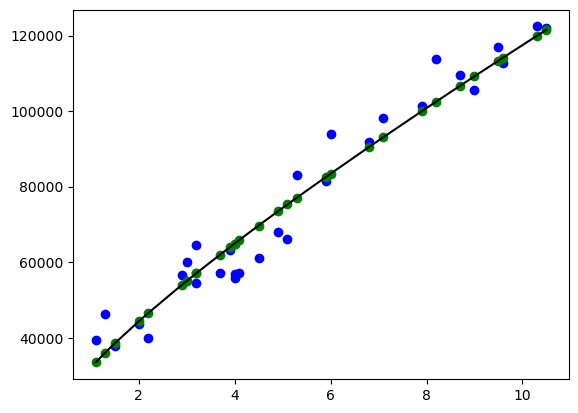

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model1_pred_y,color="green")
plt.plot(df["YearsExperience"],model1_pred_y,color="black")
plt.show()

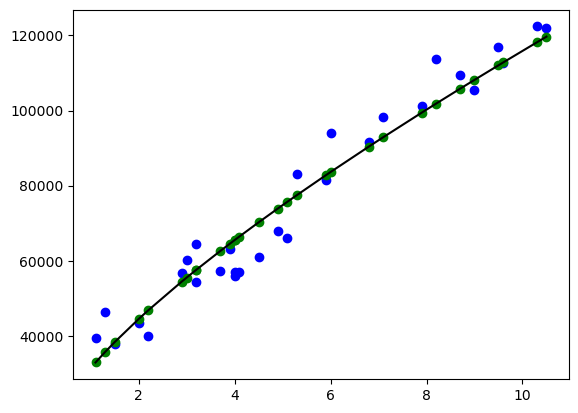

In [44]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model2_pred_y,color="green")
plt.plot(df["YearsExperience"],model2_pred_y,color="black")
plt.show()

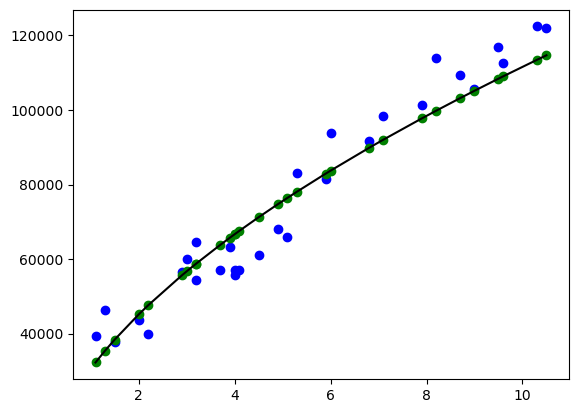

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x=df["YearsExperience"],y=df["Salary"],color="blue")
plt.scatter(x=df["YearsExperience"],y=model3_pred_y,color="green")
plt.plot(df["YearsExperience"],model3_pred_y,color="black")
plt.show()

In [46]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [47]:
from PIL import Image, ImageFont, ImageDraw 

In [49]:
my_image = Image.open("D:/1000_F_132122695_cNuq5ACUnfSfqmRgJSP1rRiGVHdVedl6.jpg")

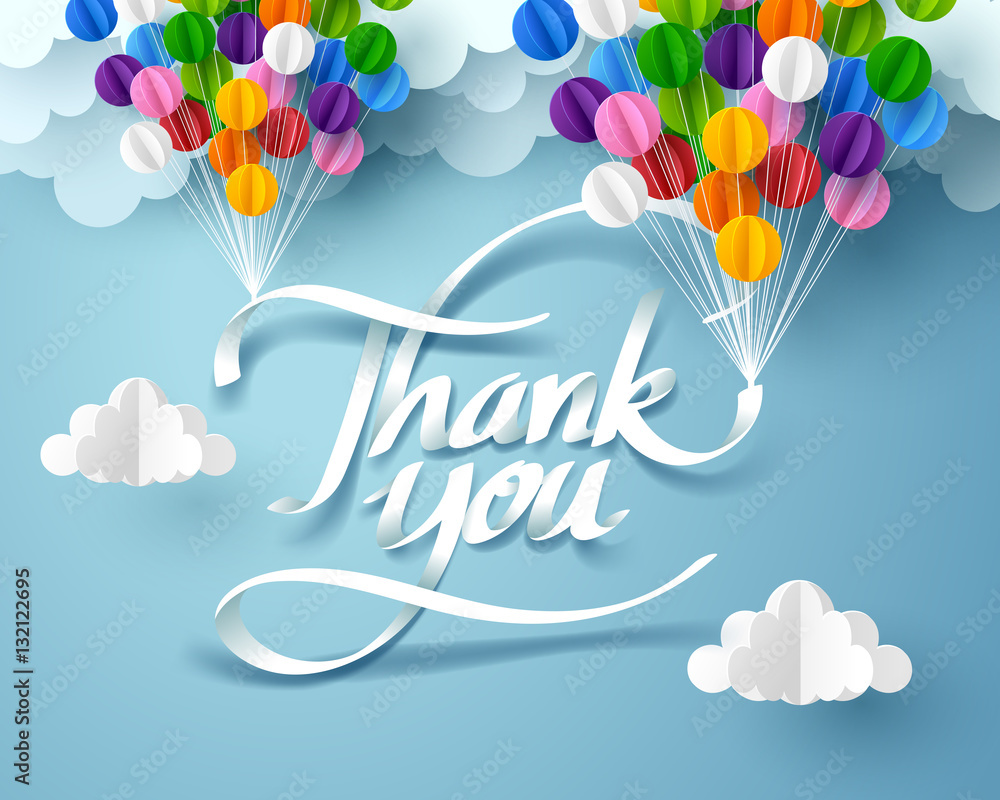

In [52]:
my_image